<a href="https://colab.research.google.com/github/AvRob0/Avrob0.github.io/blob/main/RobinsonAveryExoPlanetdataset1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
exo_pl_dta = pd.read_csv("/content/Exoplanet_2024_April_06.csv")

In [ ]:
# prompt: create a DataFrame from exo_pl_dta with all rows and columns

exo_pl_dta_df = pd.DataFrame(exo_pl_dta)
exo_pl_dta_df

In [ ]:
# prompt: clean the first 20 rows of the DataFrame

# Drop rows with missing values in the first 20 rows
exo_pl_dta_df.dropna(axis=0, how='any', inplace=True)

# Reset the index after dropping rows
exo_pl_dta_df.reset_index(drop=True, inplace=True)

# Print the first 20 rows of the cleaned DataFrame
print(exo_pl_dta_df.head(20))


In [ ]:
# prompt: With exo_pl_dta DataFrame make a Machine Learning algorithm to predict the behavior of orbital_period

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate features and target
X = exo_pl_dta_df[['planet_mass_(earth_mass)', 'planet_radius_(earth_radius)']]
y = exo_pl_dta_df['orbital_period']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
score = model.score(X_test, y_test)

# Print the model score and predictions
print("Model score:", score)
print("Predictions:", model.predict(X_test))


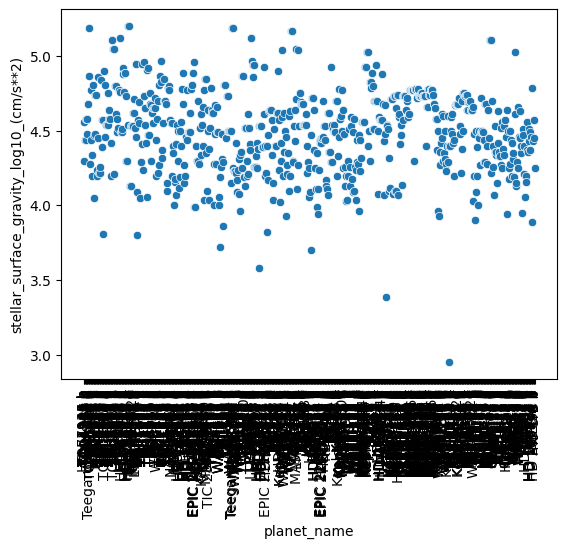

In [20]:
# prompt: show the relationship between the planets in column planet_name stellar_surface_gravity_log10_(cm/s**2)

sns.scatterplot(x="planet_name", y="stellar_surface_gravity_log10_(cm/s**2)", data=exo_pl_dta_df)
plt.xticks(rotation=90)
plt.show()


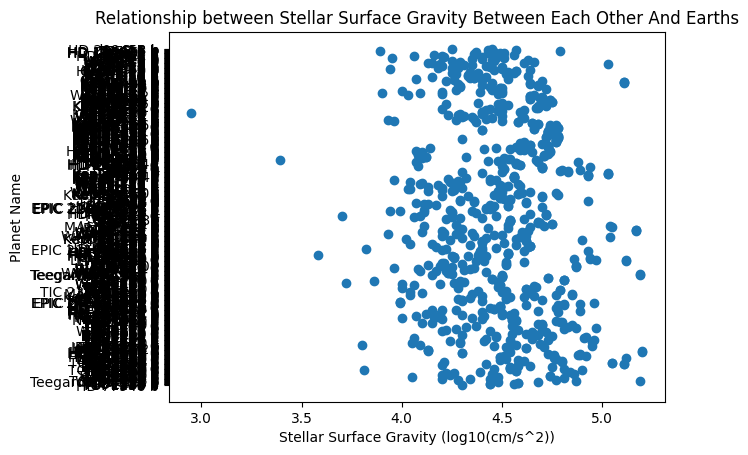

In [21]:
plt.scatter(exo_pl_dta_df['stellar_surface_gravity_log10_(cm/s**2)'], exo_pl_dta_df['planet_name'])
plt.xlabel('Stellar Surface Gravity (log10(cm/s^2))')
plt.ylabel('Planet Name')
plt.title('Relationship between Stellar Surface Gravity Between Each Other And Earths')
plt.show()

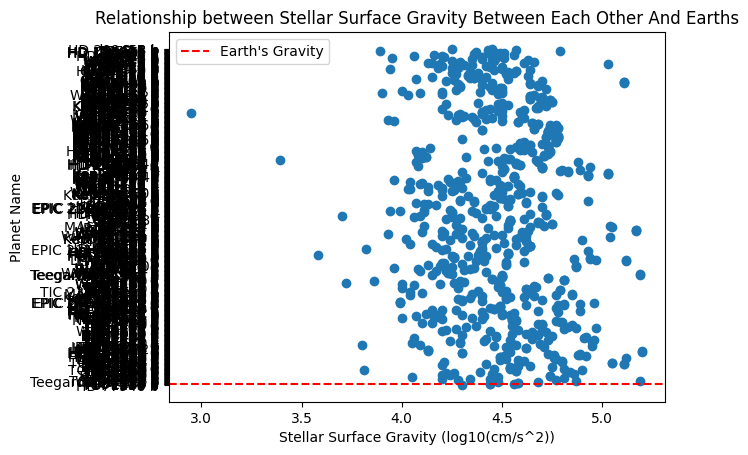

In [22]:
# Calculate Earth's stellar_surface_gravity_log10_(cm/s^2)
earth_gravity = 9.80665 # m/s^2
earth_gravity_log10 = np.log10(earth_gravity * 100) # convert to cm/s^2 and take log10

# Plot a horizontal line for Earth's gravity
plt.axhline(y=earth_gravity_log10, color='red', linestyle='--', label='Earth\'s Gravity')

# Show the plot again
plt.scatter(exo_pl_dta_df['stellar_surface_gravity_log10_(cm/s**2)'], exo_pl_dta_df['planet_name'])
plt.xlabel('Stellar Surface Gravity (log10(cm/s^2))')
plt.ylabel('Planet Name')
plt.title('Relationship between Stellar Surface Gravity Between Each Other And Earths')
plt.legend()
plt.show()

In [27]:
# prompt: group all the planets in planet_name column where the stellar_surface_gravity_log10_(cm/s**2) is close to earths

earth_gravity_log10 = np.log10(9.80665 * 100)  # Calculate Earth's gravity in cm/s^2 and take log10

# Define a threshold for closeness to Earth's gravity
threshold = 0.5

# Group planets based on their stellar surface gravity
grouped_planets = exo_pl_dta_df.groupby(
    pd.cut(exo_pl_dta_df['stellar_surface_gravity_log10_(cm/s**2)'],
           bins=[-np.inf, earth_gravity_log10 - threshold, earth_gravity_log10 + threshold, np.inf],
           labels=['Lower Gravity', 'Similar Gravity', 'Higher Gravity'])
)['planet_name'].apply(list)

# Print the groups
for group_name, planets in grouped_planets.items():
    print(f"{group_name}: {planets}")


Lower Gravity: []
Similar Gravity: ['HAT-P-56 b', 'Kepler-91 b']
Higher Gravity: ['HD 77946 b', 'TOI-1135 b', 'TOI-1386 b', 'TOI-1386 c', 'TOI-238 b', 'TOI-238 c', 'TOI-4515 b', 'TOI-4438 b', "Teegarden's Star d", 'Wolf 327 b', 'WASP-193 b', 'TOI-5293 A b', 'TOI-5398 c', 'TOI-5678 b', 'TOI-615 b', 'TOI-700 e', 'TOI-733 b', 'TOI-778 b', 'TOI-784 b', 'TOI-836 b', 'TOI-836 c', 'TOI-622 b', 'TOI-858 B b', 'TOI-908 b', 'TOI-4860 b', 'TOI-5126 b', 'TOI-5126 c', 'TOI-4127 b', 'TOI-5205 b', 'TOI-4562 b', 'TOI-4600 b', 'TOI-4600 c', 'TOI-4603 b', 'TOI-3235 b', 'TOI-332 b', 'TOI-3984 A b', 'TOI-4010 b', 'TOI-4010 c', 'TOI-4010 d', 'TOI-4010 e', 'TOI-3785 b', 'TOI-4201 b', 'TOI-2525 b', 'TOI-2525 c', 'TOI-2641 b', 'TOI-2010 b', 'TOI-2095 b', 'TOI-2095 c', 'TOI-2096 b', 'TOI-2096 c', 'TOI-2152 A b', 'TOI-2134 b', 'TOI-2134 c', 'TOI-181 b', 'TOI-1853 b', 'TOI-199 b', 'TOI-1416 b', 'TOI-1470 b', 'TOI-1470 c', 'LP 791-18 d', 'HN Lib b', 'HD 15906 b', 'HD 15906 c', 'HD 207496 b', 'GJ 3988 b', 'GJ 724 

In [29]:
# prompt: show the simalaritys HAT -P-56 B and kepler-91 b share with earth

similar_planets = grouped_planets['Similar Gravity']

hat_p_56_b = 'HAT-P-56 b'
kepler_91_b = 'Kepler-91 b'

similarities = []

if hat_p_56_b in similar_planets and kepler_91_b in similar_planets:
  # Get the data for both planets
  hat_p_56_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == hat_p_56_b]
  kepler_91_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == kepler_91_b]

  # Find commonalities between both planets
  similarities = list(set(hat_p_56_b_data.columns).intersection(kepler_91_b_data.columns))

  # Print the similarities
  print(f"Similarities between {hat_p_56_b} and {kepler_91_b}:")
  for similarity in similarities:
    print(f"\t- {similarity}")

else:
  print(f"{hat_p_56_b} and {kepler_91_b} are not both in the 'Similar Gravity' group.")


Similarities between HAT-P-56 b and Kepler-91 b:
	- insolution_flux
	- planet_mass_(jupiter_mass)
	- distance_(parsecs)
	- planet_eccentricity
	- K_(2NASS)_magnitude
	- planet_name
	- Dec_(sexagesimal)
	- closeness_to_earth_gravity
	- stellar_radius_(solar_radius)
	- discovery_facility
	- orbit_semi_major_axis_au
	- V_(Johnson)_magnitude
	- number_of_planets
	- discovery_year
	- RA_(sexagesimal)
	- orbital_period
	- discovery_method
	- controversial_flag
	- stellar_surface_gravity_log10_(cm/s**2)
	- stellar_mass_(solar_mass)
	- Dec_(decimal)
	- stellar_metallicity_ratio
	- planet_mass_(earth_mass)
	- host_name
	- planet_radius_(earth_radius)
	- stellar_effective_temperature
	- number_of_stars
	- RA_(decimal)
	- planet_mass_provenance
	- gaia_magnitude
	- planet_radius_(jupiter_radius)
	- equilibrium_temperature_(K)
	- spectral_type
	- stellar_metallicity


In [34]:
# prompt: what is HAT-P-56 b and Kepler-91 b stellar_mass_(solar_mass) compared to the sun

sun_mass = 1.0

hat_p_56_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'HAT-P-56 b']
kepler_91_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'Kepler-91 b']

hat_p_56_b_stellar_mass = hat_p_56_b_data['stellar_mass_(solar_mass)'].values[0]
kepler_91_b_stellar_mass = kepler_91_b_data['stellar_mass_(solar_mass)'].values[0]

print(f"HAT-P-56 b stellar mass compared to the Sun: {hat_p_56_b_stellar_mass / sun_mass:.2f}")
print(f"Kepler-91 b stellar mass compared to the Sun: {kepler_91_b_stellar_mass / sun_mass:.2f}")


HAT-P-56 b stellar mass compared to the Sun: 1.42
Kepler-91 b stellar mass compared to the Sun: 1.31


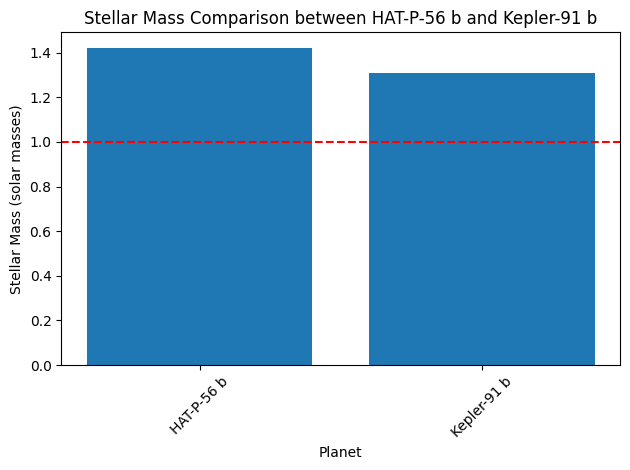

In [50]:
# prompt:  graph to show visualization of the of the difference between HAT-P-56 b and Kepler-91 b stellar_mass_(solar_mass) compared to the sun

import matplotlib.pyplot as plt

sun_mass = 1.0

hat_p_56_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'HAT-P-56 b']
kepler_91_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'Kepler-91 b']

hat_p_56_b_stellar_mass = hat_p_56_b_data['stellar_mass_(solar_mass)'].values[0]
kepler_91_b_stellar_mass = kepler_91_b_data['stellar_mass_(solar_mass)'].values[0]

planets = ['HAT-P-56 b', 'Kepler-91 b']
stellar_masses = [hat_p_56_b_stellar_mass / sun_mass, kepler_91_b_stellar_mass / sun_mass]

fig, ax = plt.subplots()

ax.bar(planets, stellar_masses)

ax.set_xlabel('Planet')
ax.set_ylabel('Stellar Mass (solar masses)')
ax.set_title('Stellar Mass Comparison between HAT-P-56 b and Kepler-91 b')
ax.axhline(y=1.0, color='red', linestyle='--', label='Sun')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
# prompt: what is the number_of_stars, number_of_planets HAT-P-56 b, Kepler-91 b have

hat_p_56_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'HAT-P-56 b']
kepler_91_b_data = exo_pl_dta_df[exo_pl_dta_df['planet_name'] == 'Kepler-91 b']

hat_p_56_b_stars = hat_p_56_b_data['number_of_stars'].values[0]
kepler_91_b_stars = kepler_91_b_data['number_of_stars'].values[0]

hat_p_56_b_planets = hat_p_56_b_data['number_of_planets'].values[0]
kepler_91_b_planets = kepler_91_b_data['number_of_planets'].values[0]

print(f"HAT-P-56 b number of stars: {hat_p_56_b_stars}")
print(f"Kepler-91 b number of stars: {kepler_91_b_stars}")
print(f"HAT-P-56 b number of planets: {hat_p_56_b_planets}")
print(f"Kepler-91 b number of planets: {kepler_91_b_planets}")


HAT-P-56 b number of stars: 1
Kepler-91 b number of stars: 1
HAT-P-56 b number of planets: 1
Kepler-91 b number of planets: 1
